In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\nicky\Documents\BME 574`


In [2]:
Pkg.add(["Plots", "Optimization", "ForwardDiff", "OptimizationOptimJL"])

   Resolving package versions...
  No Changes to `C:\Users\nicky\Documents\BME 574\Project.toml`
  No Changes to `C:\Users\nicky\Documents\BME 574\Manifest.toml`


In [3]:
using Plots, Optimization, ForwardDiff, OptimizationOptimJL

In [29]:
# define objective function (from class)
function fobj(x,p)
    return x[1]^2 + 3*(x[2]^2)
end

fobj (generic function with 1 method)

In [63]:
# empty array to store path
path = []

Any[]

In [65]:
# define callback function
function my_callback(result, val)
    push!(path, copy(result.u))
    return false
end

my_callback (generic function with 1 method)

In [67]:
# initial guess
z0 = [3.0, 2.0]

2-element Vector{Float64}:
 3.0
 2.0

In [69]:
# wrap the function
wrap = OptimizationFunction(fobj, AutoForwardDiff())

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, typeof(fobj), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED_NO_TIME), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing}) (generic function with 1 method)

In [71]:
# define the problem
problem = OptimizationProblem(wrap, z0)

OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 3.0
 2.0

In [73]:
# minimzation result
result = solve(problem, GradientDescent(), callback = my_callback)

retcode: Success
u: 2-element Vector{Float64}:
  1.6114282515494192e-9
 -2.6857137525823675e-10

In [75]:
# check if steps stored properly
path

26-element Vector{Any}:
 [3.0, 2.0]
 [1.846153846153846, -0.30769230769230793]
 [0.527472527472528, 0.3516483516483516]
 [0.3245984784446326, -0.05409974640743881]
 [0.09274242241275227, 0.06182828160850144]
 [0.05707225994630907, -0.00951204332438485]
 [0.016306359984659742, 0.010870906656439826]
 [0.010034683067482918, -0.0016724471779138213]
 [0.002867052304995124, 0.0019113682033300794]
 [0.0017643398799969988, -0.00029405664666616723]
 [0.0005040971085705727, 0.0003360647390470475]
 [0.00031021360527419843, -5.170226754569983e-5]
 [8.863245864977119e-5, 5.9088305766513984e-5]
 [5.4543051476782244e-5, -9.090508579463722e-6]
 [1.5583728993366387e-5, 1.038915266224424e-5]
 [9.58998707284085e-6, -1.598331178806813e-6]
 [2.7399963065259668e-6, 1.826664204350639e-6]
 [1.6861515732467477e-6, -2.810252622077923e-7]
 [4.817575923562156e-7, 3.21171728237476e-7]
 [2.9646621068074796e-7, -4.9411035113458064e-8]
 [8.470463162307098e-8, 5.6469754415380586e-8]
 [5.2125927152659054e-8, -8.6876545

In [79]:
# collect x coordinates
x_c = [p[1] for p in path]

26-element Vector{Float64}:
 3.0
 1.846153846153846
 0.527472527472528
 0.3245984784446326
 0.09274242241275227
 0.05707225994630907
 0.016306359984659742
 0.010034683067482918
 0.002867052304995124
 0.0017643398799969988
 0.0005040971085705727
 0.00031021360527419843
 8.863245864977119e-5
 5.4543051476782244e-5
 1.5583728993366387e-5
 9.58998707284085e-6
 2.7399963065259668e-6
 1.6861515732467477e-6
 4.817575923562156e-7
 2.9646621068074796e-7
 8.470463162307098e-8
 5.2125927152659054e-8
 1.4893122043616889e-8
 9.164998180687314e-9
 2.6185709087678066e-9
 1.6114282515494192e-9

In [81]:
# collect y coordinates
y_c = [p[2] for p in path]

26-element Vector{Float64}:
  2.0
 -0.30769230769230793
  0.3516483516483516
 -0.05409974640743881
  0.06182828160850144
 -0.00951204332438485
  0.010870906656439826
 -0.0016724471779138213
  0.0019113682033300794
 -0.00029405664666616723
  0.0003360647390470475
 -5.170226754569983e-5
  5.9088305766513984e-5
 -9.090508579463722e-6
  1.038915266224424e-5
 -1.598331178806813e-6
  1.826664204350639e-6
 -2.810252622077923e-7
  3.21171728237476e-7
 -4.9411035113458064e-8
  5.6469754415380586e-8
 -8.687654525443184e-9
  9.928748029077918e-9
 -1.52749969678122e-9
  1.7457139391785356e-9
 -2.6857137525823675e-10

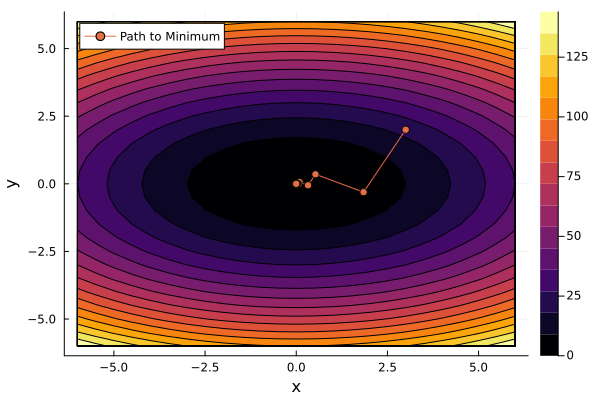

In [127]:
# create contour (from class)overlap path to minimum
step = 0.5
x_val = collect(-6:step:6)
y_val = collect(-6:step:6)
f0(x,y) = x^2 + 3*y^2
z_val = ((x,y) -> begin
        f0(x,y)
    end)
contourf(x_val, y_val, z_val, xlabel = "x", ylabel = "y", zlabel = "Original_Function")

# overlay the path to minimum
plot!(x_c, y_c, markershape=:circle, aspect=:equal, label="Path to Minimum")